# Data Processing and Visualization

**Note: It is recommended to have 8GB of ram on your system to run this code. If you have less, it is recommended to decrease the size of the images to 64x64**



In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import matplotlib.pyplot as plt

In [3]:
%cd 4152 Building Pictures

e:\Group2CompVisProject\4152 Building Pictures


## Intro: 

For our semester project, we propose a computer vision
application that has the capability of identifying buildings
across the UNCC campus. The application will be able
to take input media and return the name of the building
captured within the given media. 

**The Data:**

Our data consists of UNCC building photos taken from different angles, different times of day, and in different types of weather. The range on the image covers the area of the campus we chose to target. The building were selected from the range: 'Atkins', 'Smith', 'Belk', 'Colvard', 'Smith', 'Prospector', 'Burson', 'SAC', 'Cato', 'Woodward', 'CHHS', 'Student Union', 'UREC'. These will represent the classes in the model while the imgaes of the UNCC buildings are the objects.


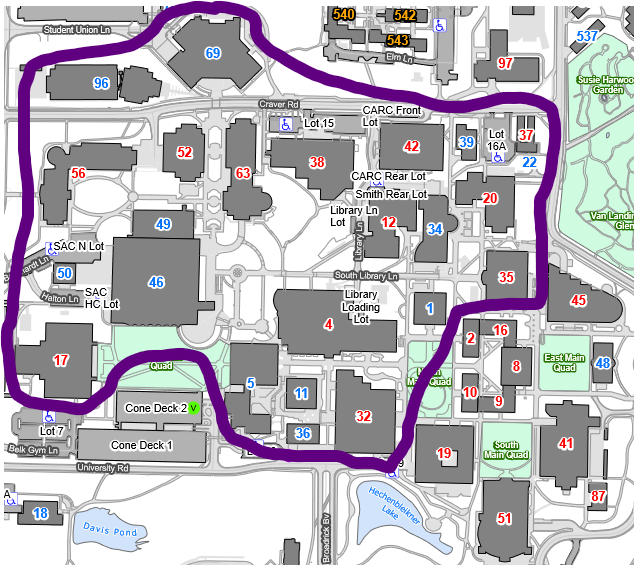


In [4]:
# Start Data processing
y_labels = []
# Create dictionary to sort and label the data
labels = {'Atkins', 'Smith', 'Belk', 'Colvard', 'Smith', 'Prospector', 'Burson', 'SAC', 'Cato', 'Woodward', 'CHHS', 'Student Union', 'UREC'}

In [5]:
# Loop through each folder
for folder in os.listdir():
  foldername = os.fsdecode(folder)
  for label in labels:
    if label in foldername:
      # Gather the length of folder and add the respective amount of labels needed to represent the image objects
      lst = os.listdir(foldername) # your directory path
      number_files = len(lst)
      y_labels.extend([label] * number_files)
     

In [10]:
images = []

# Loop through each image in all the folders
print("Loading images... Please wait... (Expect this to take around 5 mins)")

for folder in os.listdir():
  foldername = os.fsdecode(folder)
  for filename in os.listdir(foldername):
    # load and process the images
    filenamenew = foldername + '/' + filename 
    
    #print(filenamenew)
    img = cv2.imread(filenamenew)
    #IMPORTANT!!!! If you have less than 8GB of ram, change (256,256) to (64,64) when running
    img = cv2.resize(img, (256,256), cv2.INTER_LINEAR)

    # add image to the array
    images.append(img.astype(np.float)/255*2-1)

print(len(images), "images loaded!")
bundle = list(zip(images, y_labels))
    

Loading images... Please wait...
2720 images loaded!


The print statement below will display the number of sample images that make-up our dataset. Number of images: 2720 

In [11]:
print('Number of images: ', len(images))

Number of images:  2720


The array that is displayed below represents the classification types of the model. The classification represent the building name that is associated with the respective image. The building labels: ['Atkins' 'Belk' 'Burson' 'CHHS' 'Cato' 'Colvard' 'Prospector' 'SAC'
 'Smith' 'Student Union' 'UREC' 'Woodward']

In [8]:
print('Class labels:', np.unique(y_labels))

Class labels: ['Atkins' 'Belk' 'Burson' 'CHHS' 'Cato' 'Colvard' 'Prospector' 'SAC'
 'Smith' 'Student Union' 'UREC' 'Woodward']


## Training/Test Split Methodology:

While training our model, we will be using a training/test split of 80%(training) and 20%(test).

## Visualization:

Below shows various images in the dataset along with their repective labels.

SAC


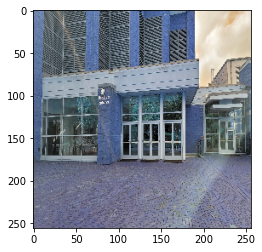

Atkins


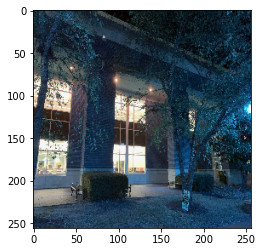

Atkins


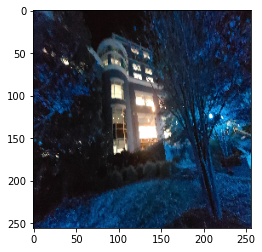

Atkins


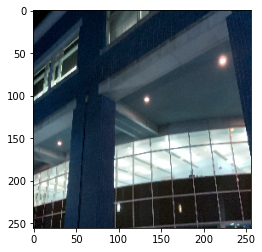

Atkins


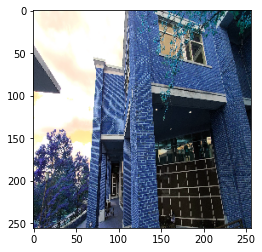

In [9]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = np.array(img)
    
    plt.figure
    plt.imshow(npimg)
    plt.show()


for n in range(5):
    random.shuffle(bundle)
    img, label = bundle[0][0], bundle[0][1]
    print(label)
    imshow(img)